<a href="https://colab.research.google.com/github/harrisb002/CS_480/blob/main/Quizes/Quiz2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
from IPython.display import Image, display

# Mount the drive
drive.mount('/content/drive')

# Define the file path
file_path = "/content/drive/Shared drives/CS480/Quizes/"

# Get images
Q1Graph = file_path + "Quiz2Graph.png"
BinaryTree = file_path + "BinaryTree.png"

Mounted at /content/drive


### 1. List the order in which the nodes will be removed from the fringe when applying DFS, BFS, IDS, and UCS (which will be a stack, queue, or a heap in the case of DFS, BFS, and UCS respectively).


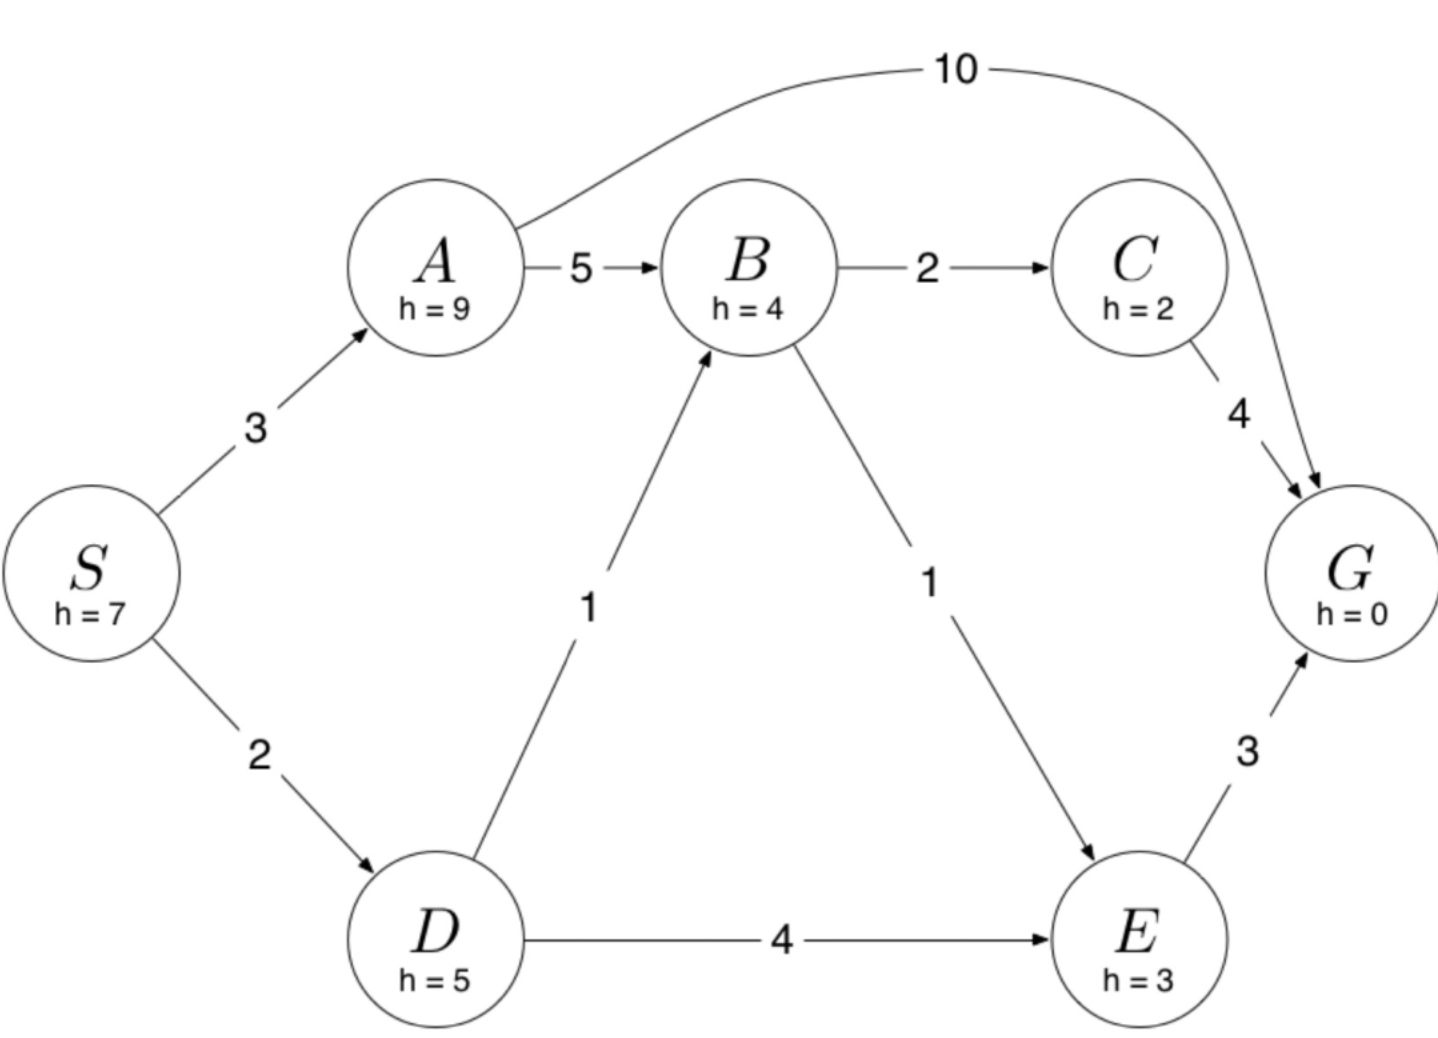

In [ ]:
# Display Graph
display(Image(Q1Graph, width=500))

#### Answer:


##### **DFS (Depth-First Search)**:
Nodes are removed in LIFO (Last-In-First-Out) order because it uses a stack. The node explored first will be the deepest unexplored node.

- Process: Explore as deep as possible along a branch, then backtrack.
Node Removal Order:
- Start with S.  => Fringe: {A, D}
- Explore A (alphabetical order), adding B to the fringe.  => Fringe: {D, B}
- Explore B, adding C.  => Fringe: {D, C}
- Explore C, adding G.  => Fringe: {D, G}
- Finally, explore G.

The order of node removal is: S, A, B, C, G

##### **BFS (Breadth-First Search)**: Nodes are removed in FIFO (First-In-First-Out) order because it uses a queue. Nodes at the current level are expanded before moving to the next level.

- Start at S.
- Enqueue A, D => Fringe: {A, D}
- Dequeue and explore A.
- From A, enqueue B => Fringe: {D, B}
- Dequeue and explore D.
- From D, enqueue B, E => Fringe: {B, E}
- Dequeue and explore B.  
- From B, enqueue  C => Fringe: {E, C}
- Dequeue and explore E.
- From E, enqueue G => Fringe: {C, G}
- Dequeue and explore C => Fringe: {G}
- Dequeue G (Goal reached)

##### **IDS (Iterative Deepening Search)**: Nodes are removed similar to DFS within each depth level, but the depth limit increases incrementally, combining the benefits of DFS and BFS.

- Depth 0: Only S is explored => Fringe {}
- Depth 1: Start at S and add A and D => Fringe: {A, D}
  - Explore A => Fringe: {D}
  - Explore D => Fringe: {}

- Depth 2: Explore S, A, D, B, E  
  - Explore S => Fringe: {A, D}
  - Explore A => Fringe: {D, B}
  - Explore D => Fringe: {B, E}
  - Explore B => Fringe: {E, C}
  - Explore E => Fringe: {C}

- Depth 3: Explore S, A, D, B, E, C, G  
  - Explore S => Fringe: {A, D}
  - Explore A => Fringe: {D, B}
  - Explore D => Fringe: {B, E}
  - Explore B => Fringe: {E, C}
  - Explore E => Fringe: {C, G}
  - Explore C => Fringe: {G}
  - Explore G => Fringe: Fringe: {} (Goal reached)



##### **UCS (Uniform Cost Search)**: Nodes are removed based on the lowest cumulative cost, meaning it uses a priority queue (heap). The node with the smallest path cost is expanded first.

- Start w/S: => Fringe: {S}
- Explore S: => Fringe: {D (cost 2), A (cost 3)}
- Explore D: => Fringe: {A (cost 3), B (cost 3), E (cost 6)}
- Explore A: => Fringe: {B (cost 3), E (cost 6)}
- Explore B: => Fringe: {E (cost 4), C (cost 5)}
- Explore E: => Fringe: {C (cost 5), G (cost 7)}
- Explore C: => Fringe: {G (cost 7)}
- Explore G: => Fringe: {} (Goal reached)

### 2. Consider a search problem in which the search graph is a binary tree with all leaf nodes at depth 5 (root is considered to be at depth 0) and the only goal node is the 10th leaf node from the left. What is the total number of nodes expanded by the (recursive version of) DFS and BFS? (Assume that the children of the nodes are considered in the left, right order.)

##### Tree of depth 4 to help visualize

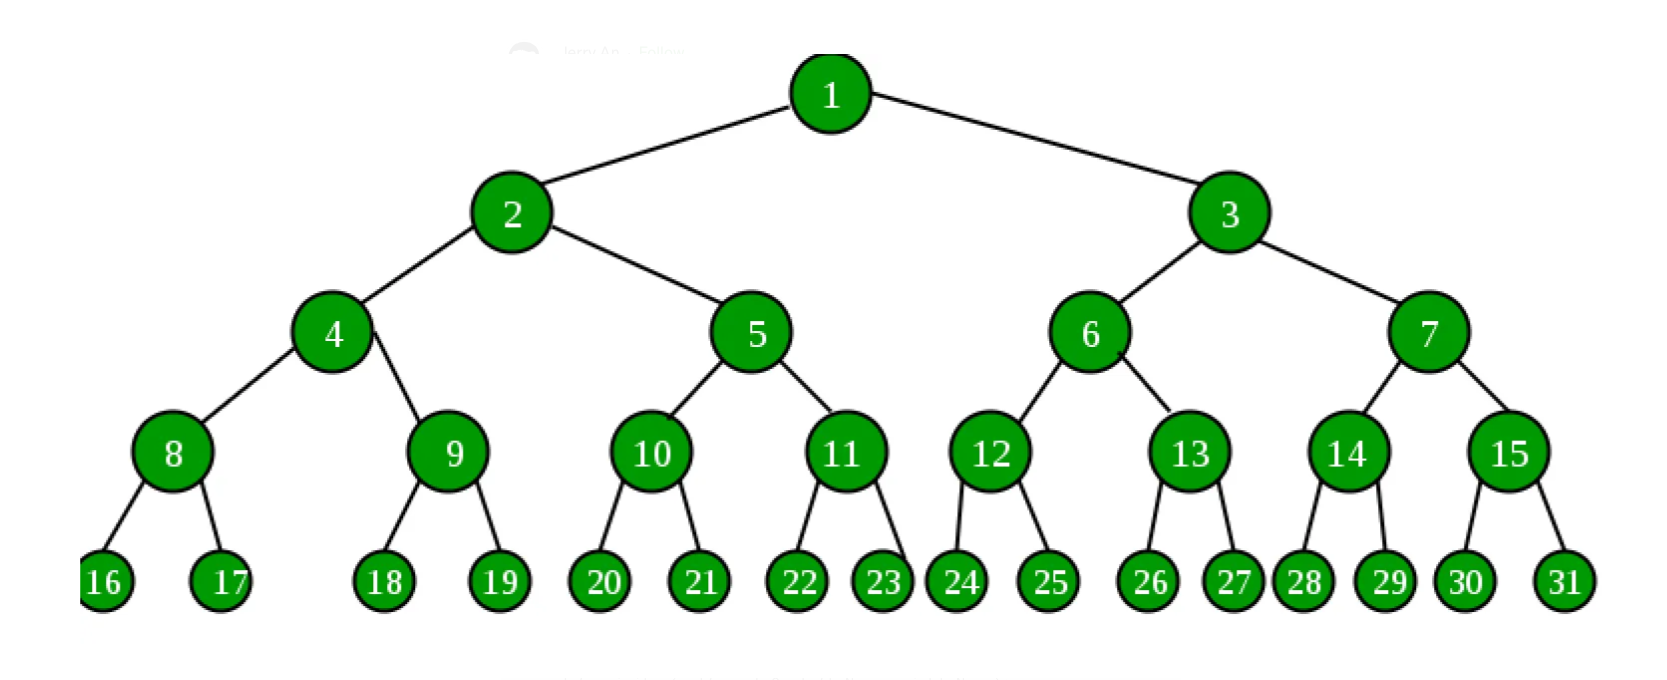

In [6]:
# Display Graph
display(Image(BinaryTree, height = 500, width=1200))

Answer:

DFS (Depth-First Search): Since DFS will explore as deep as possible before backtracking, it will explore all the nodes in the left subtree until it finds the 10th leaf node. This means DFS will expand a total of 40 nodes (all nodes in the subtree including the goal node).

BFS (Breadth-First Search): BFS explores all nodes level by level. To reach the 10th leaf node, BFS will expand nodes across all levels until it finds the goal node. This results in 21 nodes being expanded (15 nodes at levels 0 through 3, and 6 nodes at level 4).

**Assumtptions:**
- Root Depth (Depth 0): The binary tree starts at the root, which is at depth 0.
- Leaf Nodes: All leaf nodes are at depth 5.
- Goal Node: The 10th leaf node from the left is the only goal node.
- Node Expansion Order: When expanding nodes, the children are always considered in left-to-right order.

**Notes**
- A Binary Tree
  - Has nodes that each have up to two children: a left child and a right child.
  -  At depth d, there are 2^d
  nodes.
  - Total nodes at depth D (from root to the current depth) is 2^d+1


##### **Depth-First Search (DFS)**

- Starts from the root at depth 0 and expands nodes down the leftmost path first.
- DFS will continue to explore each leftmost path until it reaches the 10th leaf node.

**DFS Total Expanded Nodes:**
- DFS expands (root) 1 + 1 node at depth 1 + 2 nodes at depth 2 + 3 nodes at depth 3 + 5 nodes at depth 4 + 10 nodes at depth 5 (up to the and including the 10th leaf node).

- DFS expands all nodes along the path from the root to the 10th leaf, totaling:

**Total nodes expanded by DFS:**  1 + 1 + 2 + 3 + 5 + 9 = 22

##### **Breadth-First Search (BFS)**
- BFS starts from the root at depth 0, expanding all nodes at each depth before moving deeper.
- To find the 10th leaf node, BFS will first expand the entire tree up to the 5th depth level.
S- ince BFS works level by level, it will expand all nodes at depth 0, 1, 2, 3, 4, and finally at depth 5, where the leaf nodes are located.

- Depth 0: 1 node (root).
- Depth 1: 2 nodes (left and right child of the root).
- Depth 2: 4 nodes (all children of nodes at depth 1).
- Depth 3: 8 nodes (all children of nodes at depth 2).
- Depth 4: 16 nodes (all children of nodes at depth 3).
- Depth 5: 10 leaf nodes (up to and including the 10th leaf node).

**Total nodes expanded by BFS:** 41



### 3. Which of the following are true? Explain.

(a) In the unweighted case of state-space search using BFS, if the (unique) goal node is at distance d from the start state, all nodes at distance less than d will enter and leave the queue.

**Answer: True.** BFS guarantees that all nodes at a distance less than d will be explored before any node at distance d is explored because BFS explores all nodes level by level.

(b) In a binary heap with n keys, searching for a key can be done with O(log n) comparisons in the worst-case. (To search for a key x, the only operations allowed are to compare x with the keys stored in the heap, other than index operations.)

**Answer: False.** Searching for an arbitrary key in a binary heap is not guaranteed to be O(log n) because the structure of the heap does not allow for efficient arbitrary searches. It only allows for efficient retrieval of the minimum (or maximum) element in O(log n) time, not general key searches.


(c) IDS will terminate in a finite number of steps even if the state-space graph has cycles so long as the goal node is reachable from the start state.

**Answer: True.** IDS combines the space efficiency of DFS with the completeness of BFS by progressively deepening the search. Even with cycles, it will eventually explore all nodes up to the goal, ensuring termination in finite steps if the goal is reachable.

### 4. Consider the problem of sorting a binary string by reversing substrings (of length at least 2) as the operation. For example, you can sort 10100 as follows: 10100 -> 01100 -> 00011.

(a) What is the size of the state-space graph for the case in which the starting state is 10010101? (Only states reachable from the start state are considered as part of the state-space graph.)


**Answer:**
Total Number of possible reversals can be found by enumerating all from 2 => length of the string (8 in this case).
- Theoreticaly,for an 8-bit string the  max is 256 but this is overestimating as the unique reachable states is surely less than this upperbound.
- I will call the length of the string 'n' and the length of the substring 'k'
- Now the formula for this can be found through (n - k + 1) for finding the maximum amount of possible reversals of the string.
 - the added 1 is gonna count both the first and last possible positions.
- This come out to be : 7 + 6 + 5 + 4 + 3 + 2 + 1 = 28

However the above does not take into account that they must be unique states, just the amount of different transitions that can be made.

Therefore, it must be less than this number thus this could be seen as the upper bound?

Gonna try to code this out

In [13]:
from collections import deque

# Gene all possible successor states by reversing any substr of length > 2.
# Start by looking at every possible pair of indices (i, j) in the str where the substring between
# these indices (inclusive) will be reversed. The new state generated by the reversal is stored along with
# the description of the reversal operation.
def generate_reverse_states(s):
    n = len(s)
    transitions = []

    # loop through each poss start index i
    for i in range(n):
        # loop through each poss ending index j, making sur that the subst len > 2
        for j in range(i + 2, n + 1):
            # Rev the substr from i to j-1 to create new state
            new_state = s[:i] + s[i:j][::-1] + s[j:]
            # The new state and the corresponding transition
            transitions.append((new_state, f"Reversed S[{i}:{j}]"))

    return transitions

# BFS to explore all reachable states from the init state.
def bfs_state_space_exploration(initial_state):
  # make sure to avoid revisiting the same state mult times by keeping track of visited states.
    visited = {}  # This dictionary keeps track of all visited states and the path taken to reach them
    queue = deque([initial_state])  # I use a queue to implement BFS, starting with the initial state
    visited[initial_state] = []  # The initial state has no predecessors, so its path is an empty list

    # cont the BFS until there are no more states left
    while queue:
        current_state = queue.popleft()  # Dequeue the current state
        transitions = generate_reverse_states(current_state)  # Gen all possible successor states

        for new_state, transition_info in transitions:
            if new_state not in visited:
                # If the new state hasn't been visited yet, I mark it as visited and record the transition
                visited[new_state] = visited[current_state] + [(current_state, transition_info)]
                queue.append(new_state)  # Enqueue the new state for further exploration
            else:
                # If the state has already been visited, I just add the transition info without revisiting
                visited[new_state].extend([(current_state, transition_info)])

    return visited

# This is the starting state provided in the problem
initial_state = "10010101"
# I explore the entire state space starting from the initial state using BFS
visited_states = bfs_state_space_exploration(initial_state)
# This is the sorted state I'm trying to get
sorted_string = "00011111"

print(f"Initial state: {initial_state}")
print(f"Total number of unique states generated: {len(visited_states)}")
print("\nState transitions (from -> to):\n")

# Loopin thru each state to print out all the transitions that lead to it
for state, transitions in visited_states.items():
    for transition in transitions:
        print(f"{transition[0]} -> {state}  [{transition[1]}]")

# final sorted str and the num of unique states generated
print("\nFinal sorted string:", sorted_string)
print("Num of states generated to reach this final string:", len(visited_states))


Initial state: 10010101
Total number of unique states generated: 70

State transitions (from -> to):

10010101 -> 10010101  [Reversed S[0:4]]
10010101 -> 10010101  [Reversed S[1:3]]
10010101 -> 10010101  [Reversed S[2:5]]
10010101 -> 10010101  [Reversed S[2:7]]
10010101 -> 10010101  [Reversed S[3:6]]
10010101 -> 10010101  [Reversed S[3:8]]
10010101 -> 10010101  [Reversed S[4:7]]
10010101 -> 10010101  [Reversed S[5:8]]
01010101 -> 10010101  [Reversed S[0:2]]
00110101 -> 10010101  [Reversed S[0:3]]
01001101 -> 10010101  [Reversed S[0:5]]
10100101 -> 10010101  [Reversed S[0:6]]
10100101 -> 10010101  [Reversed S[1:5]]
10100101 -> 10010101  [Reversed S[2:4]]
01010011 -> 10010101  [Reversed S[0:7]]
10101001 -> 10010101  [Reversed S[0:8]]
10101001 -> 10010101  [Reversed S[1:7]]
10101001 -> 10010101  [Reversed S[2:6]]
11000101 -> 10010101  [Reversed S[1:4]]
11010001 -> 10010101  [Reversed S[1:6]]
11010100 -> 10010101  [Reversed S[1:8]]
10101010 -> 10010101  [Reversed S[2:8]]
10001101 -> 100101

This is rough...
No way this is workin.. shrug

(b) What are the successors of the state 10010101?

**Answer:**
Just gonna use a bubble sort deal for this bu they have to be adjecent

- Swap the first 01 pair (1-0): 01010101
- Swap the next 01 pair (0-1): 00110101
- Swap the next 01 pair (1-0): 00011101
- Swap the next 01 pair (0-1): 00011110
- Swap the last 01 pair (1-0): 00011111
- String after first pass: 00011111

In [16]:
def bubble_sort_to_sorted(s):
    current_state = list(s)
    n = len(s)
    transitions = []
    while True:
        swapped = False
        # loop thru the string to find and swap all adjacent '01' pairs
        for i in range(n - 1):
            if current_state[i] == '1' and current_state[i + 1] == '0':
                # Swap '1' and '0'
                new_state = current_state[:]
                new_state[i], new_state[i + 1] = new_state[i + 1], new_state[i]
                new_state_str = ''.join(new_state)
                transitions.append((new_state_str, f"Swapped S[{i}:{i + 2}]"))
                current_state = new_state
                swapped = True

        # If no swaps were made, the string is sorted
        if not swapped:
            break

    return transitions

# Initstate
initial_state = "10010101"
# Sortthe strby repeatedly applybubble sort-like swaps
transitions = bubble_sort_to_sorted(initial_state)

# Printout the results
print(f"Initial state: {initial_state}")
print("State transitions and the final sorted string:")
for i, (new_state, transition) in enumerate(transitions, 1):
    print(f"Step {i}: {new_state}  [{transition}]")

final_sorted_str= transitions[-1][0] if transitions else initial_state
print(f"\nFinal sorted string: {final_sorted_str}")


Initial state: 10010101
State transitions and the final sorted string:
Step 1: 01010101  [Swapped S[0:2]]
Step 2: 00110101  [Swapped S[1:3]]
Step 3: 00101101  [Swapped S[3:5]]
Step 4: 00101011  [Swapped S[5:7]]
Step 5: 00011011  [Swapped S[2:4]]
Step 6: 00010111  [Swapped S[4:6]]
Step 7: 00001111  [Swapped S[3:5]]

Final sorted string: 00001111


yeaaaa thats more like it, not ideal/optimized but itll do
